In [1]:
import pandas as pd

In [3]:


df = pd.read_csv("../data/Iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Check number of rows, columns, and data types
df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
# Check for missing values
df.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:

# Summary statistics
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
#handles duplicates
df.duplicated().sum()

#removes duplicates
df = df.drop_duplicates()

In [15]:
#makes column names lowercase and replaces blank with _
df.columns = df.columns.str.lower().str.replace(" ", "_")


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             150 non-null    int64  
 1   sepallengthcm  150 non-null    float64
 2   sepalwidthcm   150 non-null    float64
 3   petallengthcm  150 non-null    float64
 4   petalwidthcm   150 non-null    float64
 5   species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [20]:
df = df.drop('id', axis=1)


KeyError: "['id '] not found in axis"

In [21]:
df.columns.tolist()


['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm', 'species']

In [22]:
df.insert(0, 'id', range(1, len(df) + 1))


In [23]:
df.columns.tolist()

['id',
 'sepallengthcm',
 'sepalwidthcm',
 'petallengthcm',
 'petalwidthcm',
 'species']

In [24]:
df.head(5)

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
df= df.drop('id',axis=1)

In [26]:
df.columns.tolist()

['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm', 'species']

Matplotlib is building the font cache; this may take a moment.


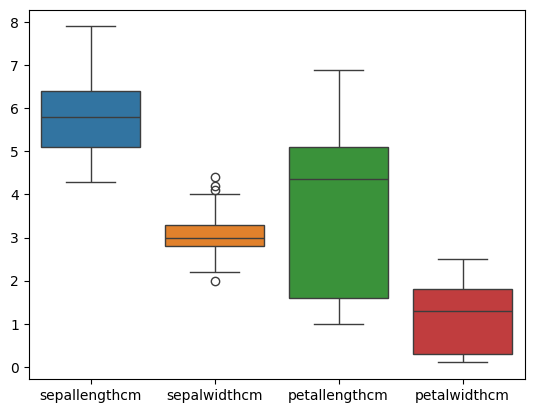

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df)
plt.show()


In [ ]:
#An outlier is a data point that is significantly different from other observations in your dataset.

#It could be too high or too low compared to most data.

#Outliers can affect analysis, like the mean, standard deviation, or even visualizations like boxplots.

In [28]:
#Calculate Q1 (25th percentile) and Q3 (75th percentile) of the column:
Q1 = df['sepalwidthcm'].quantile(0.25)
Q3 = df['sepalwidthcm'].quantile(0.75)
IQR = Q3 - Q1

df = df[ ~((df['sepalwidthcm'] < (Q1 - 1.5 * IQR)) |
           (df['sepalwidthcm'] > (Q3 + 1.5 * IQR))) ]


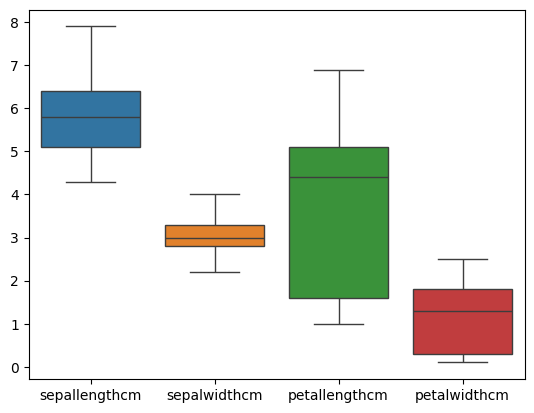

In [29]:
sns.boxplot(data=df)
plt.show()


In [30]:
df['species'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [31]:
df['species'] = df['species'].str.lower().str.strip()


In [36]:
df.species.h()

array(['iris-setosa', 'iris-versicolor', 'iris-virginica'], dtype=object)

In [37]:
# Ratio of petal length to petal width 
df['petal_ratio'] = df['petallengthcm'] / df['petalwidthcm'] 
# Ratio of sepal length to sepal width 
df['sepal_ratio'] = df['sepallengthcm'] / df['sepalwidthcm']

In [38]:
df.columns.tolist()


['sepallengthcm',
 'sepalwidthcm',
 'petallengthcm',
 'petalwidthcm',
 'species',
 'petal_ratio',
 'sepal_ratio']

In [40]:
#list of all columns
cols = df.columns.tolist()

#removing columns we wanna move
cols.remove('petal_ratio')
cols.remove('sepal_ratio')

#to find index of species
species_index = cols.index('species')

#inserting cols in right position
cols.insert(species_index, 'petal_ratio')
cols.insert(species_index + 1, 'sepal_ratio')

#reorders the dataframe
df = df[cols]

In [41]:
df.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,petal_ratio,sepal_ratio,species
0,5.1,3.5,1.4,0.2,7.0,1.457143,iris-setosa
1,4.9,3.0,1.4,0.2,7.0,1.633333,iris-setosa
2,4.7,3.2,1.3,0.2,6.5,1.468750,iris-setosa
3,4.6,3.1,1.5,0.2,7.5,1.483871,iris-setosa
4,5.0,3.6,1.4,0.2,7.0,1.388889,iris-setosa


In [42]:
df.insert(7, 'mapped_species', df['species'].map({ 
    'iris-setosa': 0,
    'iris-versicolor': 1,
    'iris-virginica': 2
}))


In [45]:
df.mapped_species.unique()

array([0, 1, 2])

In [46]:
df.to_csv("iris_cleaned.csv", index=False)
